In [103]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
Mouse_data_df=pd.read_csv(mouse_drug_data_to_load)
Drug_data_df=pd.read_csv(clinical_trial_data_to_load)

# Combine thMouse_data_dfe data into a single dataset
data_frame=[Mouse_data_df,Drug_data_df]
merge_data_df=pd.merge(Drug_data_df, Mouse_data_df, how='left',on=['Mouse ID','Mouse ID'])

# Display the data table for preview
merge_data_df.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril
5,h246,0,45.0,0,Ketapril
6,p189,0,45.0,0,Ketapril
7,n923,0,45.0,0,Ketapril
8,q119,0,45.0,0,Ketapril
9,f993,0,45.0,0,Naftisol


## Tumor Response to Treatment

In [104]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Tumor_volume_mean= merge_data_df.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']

# Convert to DataFrame
Tumor_volume_mean_df=pd.DataFrame(Tumor_volume_mean)
Tumor_volume_mean_df=Tumor_volume_mean_df.reset_index()
# Preview DataFrame
Tumor_volume_mean_df.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [105]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

Tumor_volume_StdError= merge_data_df.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)']

# Convert to DataFrame
Tumor_volume_StdError_df=pd.DataFrame(Tumor_volume_StdError)
Tumor_volume_StdError_df=Tumor_volume_StdError_df.reset_index()

# Preview DataFrame
Tumor_StdError_df.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [106]:
# Minor Data Munging to Re-Format the Data Frames


# Preview that Reformatting worked
    

In [111]:
Tumor_volume_mean_df= Tumor_volume_mean_df.reset_index()
Tumor_pivot_vol_df= Tumor_volume_mean_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

Tumor_volume_StdError_df = Tumor_volume_StdError_df.reset_index()
Tumor_pivot_volErr_df = Tumor_volume_StdError_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

Tumor_pivot_vol_df.head()
# Tumor_pivot_volErr_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


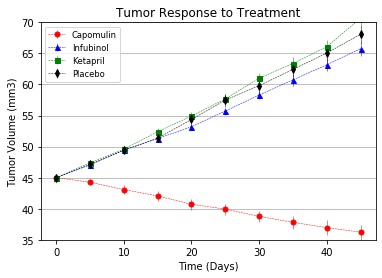

In [124]:
# Generate the Plot (with Error Bars)
# matplotlib.pyplot.errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, *, data=None, **kwargs)


# Save the Figure
plt.ylim(35, 70)
plt.errorbar(Tumor_volume_pivot_df.index,Tumor_volume_pivot_df["Capomulin"],yerr=Tumor_pivot_volErr_df['Capomulin'],
color="r",marker="o",markersize=5,xuplims=True, linestyle="dashed", linewidth=0.50)
plt.errorbar(Tumor_volume_pivot_df.index,Tumor_volume_pivot_df["Infubinol"],yerr=Tumor_pivot_volErr_df['Infubinol'],
color="b",marker="^",markersize=5,xuplims=True, linestyle="dashed", linewidth=0.50)
plt.errorbar(Tumor_volume_pivot_df.index,Tumor_volume_pivot_df["Ketapril"],yerr=Tumor_pivot_volErr_df['Ketapril'],
color="g",marker="s",markersize=5,xuplims=True, linestyle="dashed", linewidth=0.50)
plt.errorbar(Tumor_volume_pivot_df.index,Tumor_volume_pivot_df["Placebo"],yerr=Tumor_pivot_volErr_df['Placebo'],
color="k",marker="d",markersize=5,xuplims=True, linestyle="dashed", linewidth=0.50)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("analysis/Fig1.png")


In [6]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [9]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [10]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [12]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [13]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [15]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined

![Metastatic Spread During Treatment](../Images/change.png)